In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
data=pd.read_csv(r'C:\Users\satyam\Desktop\project\project 3\asign 2\raw.githubusercontent.com_dsrscientist_dataset4_main_Grades.csv')
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
data['CGPA'].unique

<bound method Series.unique of 0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64>

In [4]:
data.shape

(571, 43)

In [5]:
# removing unnessary column
data.drop(columns='Seat No.',axis=1,inplace=True)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [6]:
data.isna().sum()  #checking null values

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
# from above there are some null values

In [14]:
# filling null values
data.fillna(method='ffill',inplace=True)  # select forward fill bcz it is categorical data

In [15]:
data.isna().sum()  # again checking null values

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [17]:
#no null values

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


# here all are catrgorical data so we dont  have to checks for data distribution

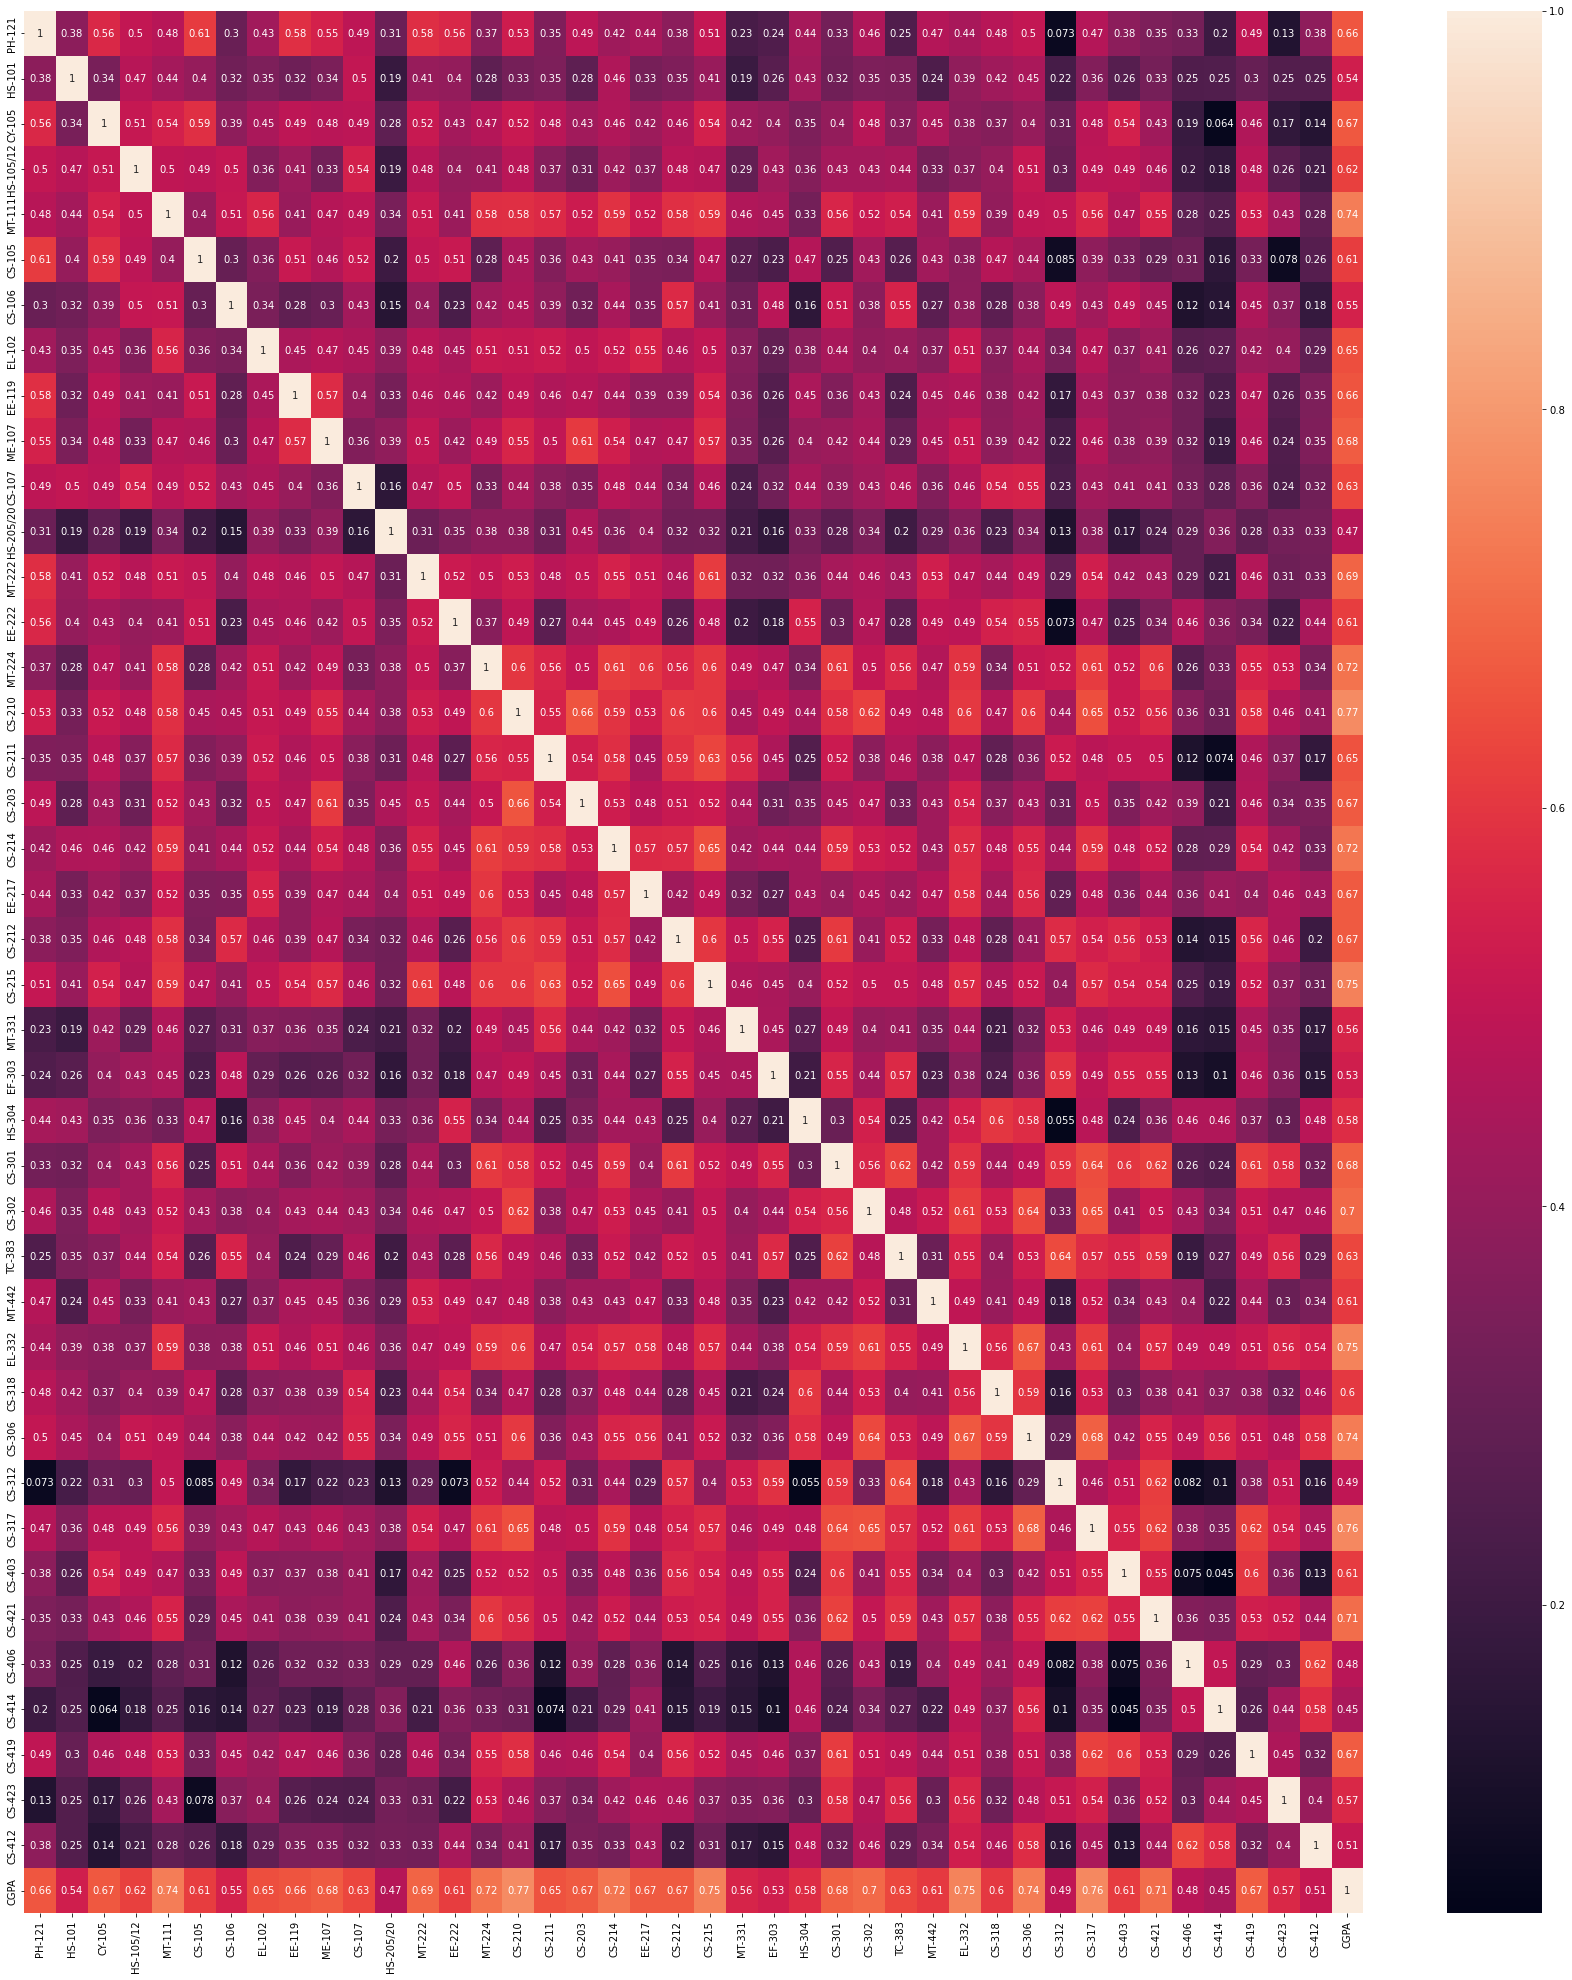

In [32]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(30,35))
sns.heatmap(relation,annot=True)
plt.show()

# using selectkbest feature selection method¶
use f_classif function where f_classif function use annova test

In [33]:
from sklearn.feature_selection import SelectKBest,f_classif

In [35]:
x=data.drop('CGPA',axis=1)                      
y=data['CGPA']

In [36]:
best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
features_score=pd.concat([df_score,df_columns],axis=1)
features_score.columns=['Scores','Features name']  # naming column
features_score.nlargest(17,'Scores')   # print 17 features

,Scores,Features name
15,4.844321,CS-210
26,4.231800,CS-302
33,3.409263,CS-317
0,3.272341,PH-121
2,3.063788,CY-105
18,2.928464,CS-214
31,2.837036,CS-306
16,2.823581,CS-211
29,2.721653,EL-332
28,2.694904,MT-442


In [41]:
#Scalling the features
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.25,random_state=355)

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
ada=AdaBoostRegressor()

In [45]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [46]:
y_pred=ada.predict(x_train)

In [47]:
x_train

array([[ 0.40040198,  1.0522189 , -0.30681433, ...,  0.0415536 ,
        -0.01003116, -1.34354795],
       [ 0.40040198, -0.02580202,  0.36829543, ..., -0.37471142,
        -0.72600525,  0.29220019],
       [ 2.0428555 , -1.10382294,  0.70585031, ...,  0.87408364,
        -0.01003116,  0.29220019],
       ...,
       [-0.25657943, -0.02580202, -0.64436921, ..., -0.37471142,
        -1.44197935, -0.11673684],
       [ 0.07191127, -1.10382294, -0.9819241 , ..., -1.62350648,
        -1.44197935, -0.11673684],
       [ 1.05738339, -0.74448263, -0.30681433, ..., -0.79097644,
        -1.44197935,  0.29220019]])

In [48]:
from sklearn.metrics import accuracy_score    # for cheking scores 
import sklearn.metrics as metrics

In [49]:
accuracy= metrics.r2_score(y_train,y_pred)    # CHEKINGS SCORE FOR TRAIN DATA
print('R square score',accuracy)

R square score 0.9398059358574348


In [50]:
y_test_pred=ada.predict(x_test)

In [52]:
accuracy=metrics.r2_score(y_test,y_test_pred)    # CHEKINF SCORE FOR TEST DATA
print('R square score',accuracy)

R square score 0.9113372507550597


# Here 91% is good accuracy so we dont do hyper tunning

# imprtinf mutiple model for which model give good accuracy

In [71]:
# importing nessary libaries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve,roc_auc_score,r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor

In [73]:
ada=AdaBoostRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()

In [74]:
ada.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('all model trained')

all model trained


In [76]:
ada.score(x_train,y_train)
rf.score(x_train,y_train)
kn.score(x_train,y_train)
dt.score(x_train,y_train)

print('all model test score capture')

all model test score capture
